# Análise e Tratamento dos Dados

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'notebook'
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/csv/heart.csv')

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### Valores Missin (NaN)

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
# # Excluir NaN
# df_tratado = df.dropna()
# df_tratado.head()

In [10]:
# df_tratado.shape

In [11]:
# df_tratado.isnull().sum()

In [12]:
df_tratado = df.copy()

df_tratado['Age'].fillna(df_tratado['Age'].mean())
df_tratado.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Análise Estatísticas Descritivas

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
df.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


In [15]:
print(f'Moda: {df['Age'].mode()[0]:.0f} | Média: {df['Age'].mean():.0f} | Mediana: {df['Age'].median():.0f}')
# Moda e mediana são iguais e são muito próximas da média, tendência para uma distribuição normal

Moda: 54 | Média: 54 | Mediana: 54


#### Medidas de Posição

In [16]:
df_idade = df['Age']
quartis_idade = list(df_idade.quantile([0.25, 0.5, 0.75]))

print(f'''
      MEDIDAS DE POSIÇÃO PARA A IDADE:
      
      Valor máximo: {df_idade.max():.0f}
      Valor mínimo: {df_idade.min():.0f}
      Primeiro quartil: {quartis_idade[0]:.0f}
      Mediana: {quartis_idade[1]:.0f}
      Terceiro quartil: {quartis_idade[2]:.0f}
      Desvio padrão amostral: {df_idade.std():.6f}
      ''')


      MEDIDAS DE POSIÇÃO PARA A IDADE:

      Valor máximo: 77
      Valor mínimo: 28
      Primeiro quartil: 47
      Mediana: 54
      Terceiro quartil: 60
      Desvio padrão amostral: 9.432617
      


In [17]:
df_pressao = df['RestingBP']
quartis_pressao = list(df_pressao.quantile([0.25, 0.5, 0.75]))

print(f'''
      MEDIDAS DE POSIÇÃO PARA A PRESSÃO
      
      Valor máximo: {df_pressao.max():.0f}
      Valor mínimo: {df_pressao.min():.0f}
      Primeiro quartil: {quartis_pressao[0]:.0f}
      Mediana: {quartis_pressao[1]:.0f}
      Terceiro quartil: {quartis_pressao[2]:.0f}
      Desvio padrão amostral: {df_pressao.std():.6f}
      ''')


      MEDIDAS DE POSIÇÃO PARA A PRESSÃO

      Valor máximo: 200
      Valor mínimo: 0
      Primeiro quartil: 120
      Mediana: 130
      Terceiro quartil: 140
      Desvio padrão amostral: 18.514154
      


#### Tratamento Dados Incoerentes

##### Avaliando dados com pressão 0

In [18]:
qtd_zero = (df['RestingBP'] == 0).sum()
print(qtd_zero)

1


Como só tem uma linha com pressão igual a zero, pode-se excluir essa linha

In [19]:
df_tratado = df.loc[df['RestingBP'] != 0] # loc filtra os dados

In [20]:
df_tratado.shape

(917, 12)

In [21]:
df_tratado.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Avaliando o Colesterol

In [22]:
df_tratado['Cholesterol'].value_counts() # Muitos valores com colesterol zero

Cholesterol
0      171
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [23]:
df_tratado['Cholesterol'].mean() # Média vai tender a zero. Para ser uma distribuição normal é interessante calcular a média sem considerar zero

np.float64(199.0163576881134)

In [24]:
df_tratado2 = df_tratado.copy()

In [25]:
df_tratado2['Cholesterol'] = df_tratado2['Cholesterol'].replace(0, np.nan)

In [26]:
df_tratado2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [27]:
df_tratado2.Cholesterol.mean()

np.float64(244.6353887399464)

Substituir valores missing pela média

In [28]:
df_tratado2['Cholesterol'] = df_tratado2['Cholesterol'].fillna(df_tratado2.Cholesterol.mean())

In [29]:
df_tratado2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
df_tratado2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<Axes: xlabel='Cholesterol', ylabel='Count'>

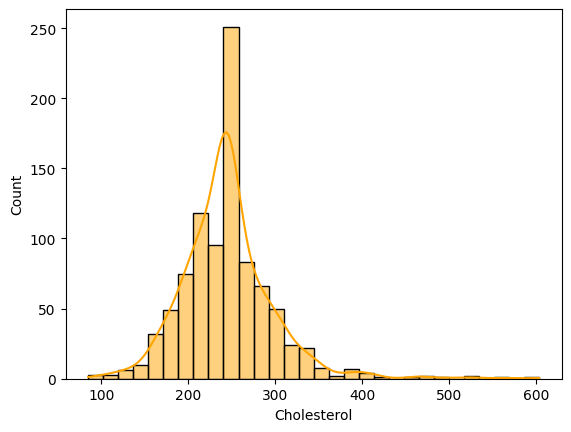

In [31]:
sns.histplot(df_tratado2,x='Cholesterol', bins=30, color='orange',kde=True, stat='count')

Análise de Outiliers

In [32]:
# Idade
px.box(df_tratado2, y='Age')

In [33]:
# Pressão sanguínea em repouso
px.box(df_tratado2, y='RestingBP')

In [34]:
# Colesterol
px.box(df_tratado2, y='Cholesterol')

In [35]:
# Frequência cardíaca
px.box(df_tratado2, y='MaxHR')

### Salvando o Dataframe Tratado

In [36]:
df_tratado2.to_csv('../data/csv/processed/heart_tratado.csv', encoding='utf-8', index=False)